# Metin Tabanlı Modeller ve Benzerlik Analizi
# - Endüstriyel Arıza Kodları Eşleştirme

Bu notebook, "Metin Tabanlı Veri Setleri ile Yapay Zekâ Modelleri Geliştirme" 
"Eğitilen Modellerle Metin Benzerliği Hesaplama ve Değerlendirme" yönergelerine uygun olarak düzenlenmiştir.


# 1.Gerekli Kütüphanelerin Kurulumu ve NLTK Veri Setleri

In [1]:
!pip install nltk gensim scikit-learn pandas numpy matplotlib
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer, PorterStemmer
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Bilinmiyor\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Bilinmiyor\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Bilinmiyor\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

# 2. Veri Dosyalarını Yükleme ve Birleştirme

In [2]:
import pandas as pd

# Verileri yükle
industrial_df = pd.read_csv("../data/industrial_fault_codes.csv")
mercedes_df = pd.read_csv("../data/mercedes_and_dtc_fault_codes.csv")

# Sütun adlarını eşitle ve birleştir
industrial_df = industrial_df[["Hata Kodu","Aciklama"]].rename(columns={"Aciklama": "Arıza Detayı" , "Hata Kodu": "Arıza Kodu"})
mercedes_df = mercedes_df[["fault code","code description"]].rename(columns={"code description": "Arıza Detayı" , "fault code": "Arıza Kodu"})

# Veri setlerini birleştir
df_birlesik = pd.concat([industrial_df, mercedes_df], ignore_index=True).dropna()
# Yeni birleşik veri setini kaydet
df_birlesik.to_csv("../data/birlesik_aciklamalar.csv", index=False)
print("✅ 'birlesik_aciklamalar.csv' data klasörüne başarıyla kaydedildi.")



✅ 'birlesik_aciklamalar.csv' data klasörüne başarıyla kaydedildi.


# 3. Zipf Yasası Analizi(Ham veri)

In [3]:
df_birlesik

,Arıza Kodu,Arıza Detayı
0,H1,NTC sensor short circuit or open circuit
1,H2,Heater short circuit
2,H3,Heater continuously operating
3,H4,Continuous water intake error
4,H5,Water drainage error
...,...,...
2208,P1201,Evaporative Emission EVAP System Flow During N...
2209,P1202,EVAP Vacuum Switch High Voltage During IGN On ...
2210,P1203,Barometric Pressure Sensor Performance Baromet...
2211,P1204,Cooling Fan Control System Cooling Fan Control...


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Bilinmiyor\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


NameError: name 'os' is not defined

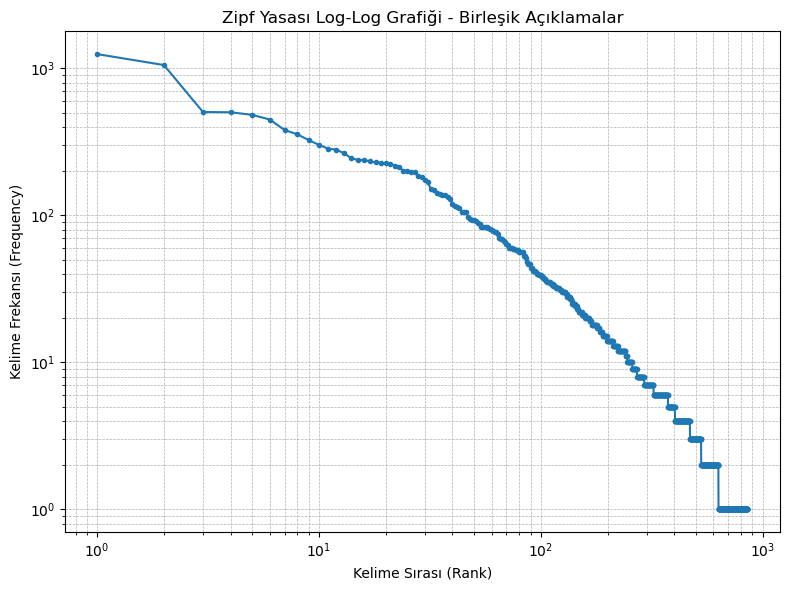

In [4]:
import matplotlib.pyplot as plt
from collections import Counter
import numpy as np
import nltk
from nltk.tokenize import word_tokenize

nltk.download('punkt')

# Birleştirilmiş dosyayı yükle
df = pd.read_csv("../data/birlesik_aciklamalar.csv")

# Metinleri birleştir ve temizle
all_text = " ".join(df["Arıza Detayı"].astype(str).tolist()).lower()
tokens = word_tokenize(all_text)
tokens = [token for token in tokens if token.isalpha()]  # sadece harflerden oluşan kelimeler

# Frekansları say
word_freq = Counter(tokens)
sorted_freq = sorted(word_freq.values(), reverse=True)

# Log-log grafiği (Zipf)
ranks = np.arange(1, len(sorted_freq) + 1)
frequencies = np.array(sorted_freq)

plt.figure(figsize=(8,6))
plt.loglog(ranks, frequencies, marker=".")
plt.title("Zipf Yasası Log-Log Grafiği - Birleşik Açıklamalar")
plt.xlabel("Kelime Sırası (Rank)")
plt.ylabel("Kelime Frekansı (Frequency)")
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.tight_layout()

# 📁 Klasör oluşturulmamışsa oluştur
os.makedirs("../zipf", exist_ok=True)
plt.savefig("../zipf/zipf_hamveri_loglog.png", dpi=300)
plt.show()
# Veri boyutu bilgisi
print(f"Toplam belge sayısı: {len(df)}")
print(f"Eşsiz kelime sayısı: {len(word_freq)}")
print(f"Toplam kelime sayısı: {len(tokens)}")

if len(tokens) < 1000:
    print("⚠️ Veri seti küçük sayılır. Zipf analizi sınırlı bilgi sağlayabilir.")
else:
    print("✅ Veri seti Zipf analizi için yeterlidir.")

print("✅ Zipf yasası grafiği zipf klasörüne kaydedildi.")

# 4. Ön İşleme (Pre-processing) Aşamaları

In [ ]:
import pandas as pd

# Birleştirilmiş açıklamaları yükle
df_birlesik = pd.read_csv("../data/birlesik_aciklamalar.csv")
df_birlesik = df.dropna()
df_birlesik = df.reset_index(drop=True)

# İlk 5 veri örneği
df_birlesik.head()


In [5]:
# Lowercasing ve HTML/Özel Karakter Temizliği
import re
from bs4 import BeautifulSoup

def clean_text(text):
    # HTML etiketlerini kaldır (gerekirse)
    text = BeautifulSoup(text, "html.parser").get_text()
    # Özel karakterleri kaldır
    text = re.sub(r"[^a-zA-Z0-9\s]", "", text)
    # Küçük harfe çevir
    return text.lower()

df_birlesik["cleaned"] = df_birlesik["Arıza Detayı"].apply(clean_text)

# Örnek dönüşüm
print("Örnek orijinal metin:\n", df_birlesik["Arıza Detayı"].iloc[0])
print("\nTemizlenmiş:\n", df_birlesik["cleaned"].iloc[0])


Örnek orijinal metin:
 NTC sensor short circuit or open circuit

Temizlenmiş:
 ntc sensor short circuit or open circuit


C:\Users\Bilinmiyor\AppData\Local\Temp\ipykernel_8660\1985895356.py:7: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  text = BeautifulSoup(text, "html.parser").get_text()


In [6]:
# Tokenization ve Noktalama İşareti Kaldırma
from nltk.tokenize import word_tokenize
import string

def tokenize(text):
    tokens = word_tokenize(text)
    tokens = [t for t in tokens if t.isalpha()]  # sadece alfabetik kelimeler
    return tokens

df_birlesik["tokens"] = df_birlesik["cleaned"].apply(tokenize)

# Örnek
print("Tokenized örnek:", df_birlesik["tokens"].iloc[0])


Tokenized örnek: ['ntc', 'sensor', 'short', 'circuit', 'or', 'open', 'circuit']


In [7]:
# Stop Word Removal
from nltk.corpus import stopwords
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))

def remove_stopwords(tokens):
    return [t for t in tokens if t not in stop_words]

df_birlesik["no_stopwords"] = df_birlesik["tokens"].apply(remove_stopwords)

# Örnek
print("Stopword çıkarıldıktan sonra:", df_birlesik["no_stopwords"].iloc[0])


Stopword çıkarıldıktan sonra: ['ntc', 'sensor', 'short', 'circuit', 'open', 'circuit']


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Bilinmiyor\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [8]:
# Lemmatization
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

lemmatizer = WordNetLemmatizer()

def lemmatize(tokens):
    return [lemmatizer.lemmatize(t) for t in tokens]

df_birlesik["lemmatized"] = df_birlesik["no_stopwords"].apply(lemmatize)

# Örnek
print("Lemmatized:", df_birlesik["lemmatized"].iloc[0])


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Bilinmiyor\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Lemmatized: ['ntc', 'sensor', 'short', 'circuit', 'open', 'circuit']


In [9]:
# Sitemming
from nltk.stem import PorterStemmer

stemmer = PorterStemmer()

def stem(tokens):
    return [stemmer.stem(t) for t in tokens]

df_birlesik["stemmed"] = df_birlesik["no_stopwords"].apply(stem)

# Örnek
print("Stemmed:", df_birlesik["stemmed"].iloc[0])


Stemmed: ['ntc', 'sensor', 'short', 'circuit', 'open', 'circuit']


In [10]:
# Önişlenmiş verileri Tekrar string'e çevirerek kaydet
df_birlesik["lemmatized_text"] = df_birlesik["lemmatized"].apply(lambda x: " ".join(x))
df_birlesik["stemmed_text"] = df_birlesik["stemmed"].apply(lambda x: " ".join(x))

df_birlesik[["Arıza Detayı", "lemmatized_text"]].to_csv("../data/lemmatized.csv", index=False)
df_birlesik[["Arıza Detayı", "stemmed_text"]].to_csv("../data/stemmed.csv", index=False)

print("✅ lemmatized.csv ve stemmed.csv başarıyla data klasörüne kaydedildi.")


✅ lemmatized.csv ve stemmed.csv başarıyla data klasörüne kaydedildi.


# 5.Temizlenmiş Veri Seti Çıktısı ve Zipf Grafikleri

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Bilinmiyor\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


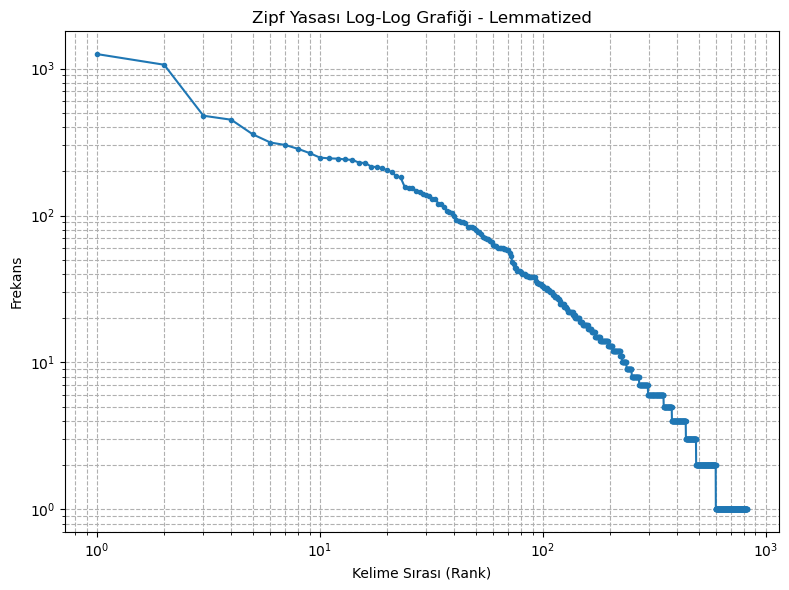

Toplam metin sayısı: 2213
Toplam kelime sayısı: 17604
Eşsiz kelime sayısı: 823
✅ Veri seti Zipf analizi için yeterlidir.
✅ Zipf Lemmatized grafiği Zipf klasörüne kaydedildi.


In [11]:
# lemmatized.csv Zipf Grafiği ve Değerlendirme
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import numpy as np
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')

# Veri yükle
lem_df = pd.read_csv("../data/lemmatized.csv")

# Tüm metinleri birleştir ve tokenize et
all_text = " ".join(lem_df["lemmatized_text"].astype(str).tolist())
tokens = word_tokenize(all_text)
tokens = [t for t in tokens if t.isalpha()]

# Frekans sayımı
freq = Counter(tokens)
sorted_freq = sorted(freq.values(), reverse=True)

# Zipf log-log grafiği
ranks = np.arange(1, len(sorted_freq) + 1)
frequencies = np.array(sorted_freq)

plt.figure(figsize=(8,6))
plt.loglog(ranks, frequencies, marker=".")
plt.title("Zipf Yasası Log-Log Grafiği - Lemmatized")
plt.xlabel("Kelime Sırası (Rank)")
plt.ylabel("Frekans")
plt.grid(True, which="both", linestyle="--")
plt.tight_layout()
plt.savefig("../zipf/zipf_lemmatized_loglog.png", dpi=300)
plt.show()

print(f"Toplam metin sayısı: {len(lem_df)}")
print(f"Toplam kelime sayısı: {len(tokens)}")
print(f"Eşsiz kelime sayısı: {len(freq)}")

if len(tokens) < 1000:
    print("⚠️ Veri seti küçük sayılır. Zipf analizi sınırlı bilgi sağlayabilir.")
else:
    print("✅ Veri seti Zipf analizi için yeterlidir.")
print("✅ Zipf Lemmatized grafiği Zipf klasörüne kaydedildi.")

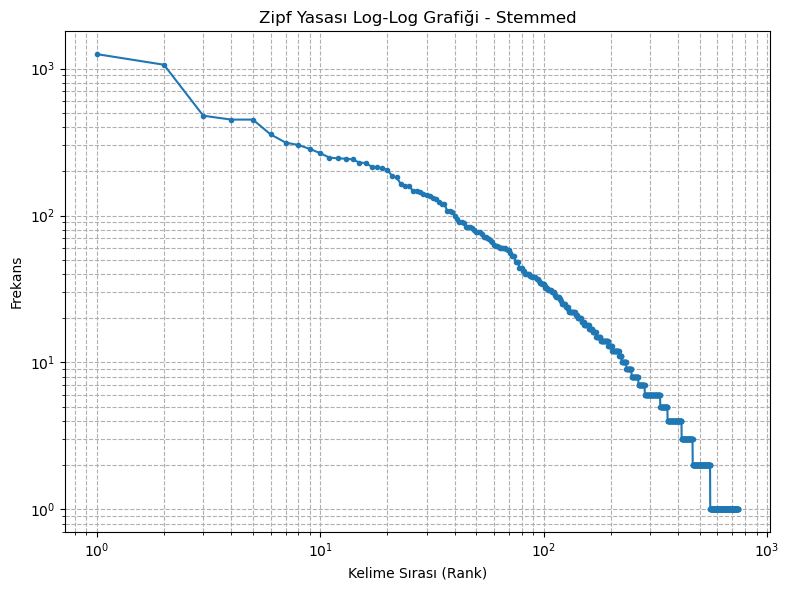

Toplam metin sayısı: 2213
Toplam kelime sayısı: 17604
Eşsiz kelime sayısı: 742
✅ Veri seti Zipf analizi için yeterlidir.
✅ Zipf Stemmed grafiği Zipf klasörüne kaydedildi.


In [12]:
# stemmed.csv Zipf Grafiği ve Değerlendirme
# Veri yükle
stem_df = pd.read_csv("../data/stemmed.csv")

# Tüm metinleri birleştir ve tokenize et
all_text = " ".join(stem_df["stemmed_text"].astype(str).tolist())
tokens = word_tokenize(all_text)
tokens = [t for t in tokens if t.isalpha()]

# Frekans sayımı
freq = Counter(tokens)
sorted_freq = sorted(freq.values(), reverse=True)

# Zipf log-log grafiği
ranks = np.arange(1, len(sorted_freq) + 1)
frequencies = np.array(sorted_freq)

plt.figure(figsize=(8,6))
plt.loglog(ranks, frequencies, marker=".")
plt.title("Zipf Yasası Log-Log Grafiği - Stemmed")
plt.xlabel("Kelime Sırası (Rank)")
plt.ylabel("Frekans")
plt.grid(True, which="both", linestyle="--")
plt.tight_layout()
plt.savefig("../zipf/zipf_stemmed_loglog.png", dpi=300)
plt.show()

print(f"Toplam metin sayısı: {len(stem_df)}")
print(f"Toplam kelime sayısı: {len(tokens)}")
print(f"Eşsiz kelime sayısı: {len(freq)}")

if len(tokens) < 1000:
    print("⚠️ Veri seti küçük sayılır. Zipf analizi sınırlı bilgi sağlayabilir.")
else:
    print("✅ Veri seti Zipf analizi için yeterlidir.")
print("✅ Zipf Stemmed grafiği Zipf klasörüne kaydedildi.")

# 6. Vektörleştirme (TF-IDF ve Word2Vec)

A. TF-IDF Vektörleştirme Kodları

In [13]:
# Lemmatized TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

# Lemmatized veri yükle
lem_df = pd.read_csv("../data/lemmatized.csv")

# Boş (NaN) satırları temizle
lem_df["lemmatized_text"] = lem_df["lemmatized_text"].fillna("")

# TF-IDF hesapla
vectorizer_lem = TfidfVectorizer()
X_lem = vectorizer_lem.fit_transform(lem_df["lemmatized_text"])

# Kaydet
tfidf_lem_df = pd.DataFrame(X_lem.toarray(), columns=vectorizer_lem.get_feature_names_out())
tfidf_lem_df.to_csv("../data/tfidf_lemmatized.csv", index=False)

print("✅ TF-IDF (lemmatized) vektörleri başarıyla oluşturuldu ve data klasörüne kaydedildi: tfidf_lemmatized.csv")




✅ TF-IDF (lemmatized) vektörleri başarıyla oluşturuldu ve data klasörüne kaydedildi: tfidf_lemmatized.csv


In [14]:
# İlk cümle için TF-IDF skorlarını al
first_sentence_vector = tfidf_lem_df.iloc[0]

# Skorlara göre sırala (yüksekten düşüğe)
top_5_words = first_sentence_vector.sort_values(ascending=False).head(5)

# Sonucu yazdır
print("İlk cümlede en yüksek TF-IDF skoruna sahip 5 kelime:")
print(top_5_words)

İlk cümlede en yüksek TF-IDF skoruna sahip 5 kelime:
ntc        0.752150
open       0.392912
circuit    0.388855
short      0.271288
sensor     0.234702
Name: 0, dtype: float64


In [15]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Parametre: hangi veri seti (lemmatized / stemmed)
mode = "lemmatized"  # ya da "stemmed"
text_col = f"{mode}_text"
input_index = 3  # Giriş metni satırı

# Veri yolu
df = pd.read_csv(f"../data/{mode}.csv")
df[text_col] = df[text_col].fillna("")

# TF-IDF vektörleştirme
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(df[text_col])

# Giriş metninin vektörü
input_vec = tfidf_matrix[input_index]

# Cosine similarity hesapla
similarities = cosine_similarity(input_vec, tfidf_matrix)[0]
similarities[input_index] = 0  # Kendisiyle eşleşmeyi dışla

# En benzer 5 açıklamayı bul
top5_idx = similarities.argsort()[-5:][::-1]
print(f"\n📌 TF-IDF ({mode}) modeline göre giriş metnine en benzer 5 açıklama:\n")

for i, idx in enumerate(top5_idx, 1):
    sim_score = round(similarities[idx], 4)
    print(f"{i}. [Skor: {sim_score}] → {df[text_col].iloc[idx][:100]}...")



📌 TF-IDF (lemmatized) modeline göre giriş metnine en benzer 5 açıklama:

1. [Skor: 0.5317] → water pressure error...
2. [Skor: 0.509] → water temperature sensor error...
3. [Skor: 0.4943] → water level error...
4. [Skor: 0.4853] → water supply error...
5. [Skor: 0.4753] → water level sensor error...


In [16]:
# Stemmed TF-IDF
# Stemmed veri yükle
stem_df = pd.read_csv("../data/stemmed.csv")

# Boş (NaN) satırları temizle
stem_df["stemmed_text"] = stem_df["stemmed_text"].fillna("")

# TF-IDF hesapla
vectorizer_stem = TfidfVectorizer()
X_stem = vectorizer_stem.fit_transform(stem_df["stemmed_text"])

# Kaydet
tfidf_stem_df = pd.DataFrame(X_stem.toarray(), columns=vectorizer_stem.get_feature_names_out())
tfidf_stem_df.to_csv("../data/tfidf_stemmed.csv", index=False)

print("✅ TF-IDF (stemmed) vektörleri başarıyla oluşturuldu ve data klasörüne kaydedildi: tfidf_stemmed.csv")


✅ TF-IDF (stemmed) vektörleri başarıyla oluşturuldu ve data klasörüne kaydedildi: tfidf_stemmed.csv


In [17]:
# İlk cümle için TF-IDF skorlarını al
first_sentence_vector = tfidf_stem_df.iloc[0]

# Skorlara göre sırala (yüksekten düşüğe)
top_5_words = first_sentence_vector.sort_values(ascending=False).head(5)

# Sonucu yazdır
print("İlk cümlede en yüksek TF-IDF (stemmed) skoruna sahip 5 kelime:")
print(top_5_words)

İlk cümlede en yüksek TF-IDF (stemmed) skoruna sahip 5 kelime:
ntc        0.752150
open       0.392912
circuit    0.388855
short      0.271288
sensor     0.234702
Name: 0, dtype: float64


B. Word2Vec Vektörleştirme (16 model)

In [18]:
# Word2Vec Parametre Setleri ve Eğitim Döngüsü
from gensim.models import Word2Vec
import pandas as pd
import os

# 📁 Klasör oluşturulmamışsa oluştur
os.makedirs("../models", exist_ok=True)

# 🧪 Parametre kombinasyonları (8 adet)
parameters = [
    {'model_type': 'cbow', 'window': 2, 'vector_size': 100},
    {'model_type': 'skipgram', 'window': 2, 'vector_size': 100},
    {'model_type': 'cbow', 'window': 4, 'vector_size': 100},
    {'model_type': 'skipgram', 'window': 4, 'vector_size': 100},
    {'model_type': 'cbow', 'window': 2, 'vector_size': 300},
    {'model_type': 'skipgram', 'window': 2, 'vector_size': 300},
    {'model_type': 'cbow', 'window': 4, 'vector_size': 300},
    {'model_type': 'skipgram', 'window': 4, 'vector_size': 300},
]

# 📊 Her veri tipi için ayrı ayrı (lemmatized, stemmed)
for mode in ["lemmatized", "stemmed"]:
    path = f"../data/{mode}.csv"
    df = pd.read_csv(path)
    
    text_col = f"{mode}_text"
    df[text_col] = df[text_col].fillna("")
    sentences = df[text_col].apply(lambda x: x.split()).tolist()

    for params in parameters:
        model_type = params["model_type"]
        sg = 1 if model_type == "skipgram" else 0
        window = params["window"]
        vector_size = params["vector_size"]

        # 🔤 Model ismi örneği: word2vec_lemmatized_cbow_win2_dim100.model
        model_name = f"word2vec_{mode}_{model_type}_win{window}_dim{vector_size}"
        model_path = f"../models/{model_name}.model"

        print(f"\n🧠 Model eğitiliyor: {model_name}")

        # 🎓 Eğitim
        model = Word2Vec(
            sentences=sentences,
            vector_size=vector_size,
            window=window,
            sg=sg,
            min_count=1
        )

        # 💾 Kaydet
        model.save(model_path)
        print(f"✅ Kaydedildi: {model_path}")

        # 🔍 Örnek kelime benzerliği
        try:
            print(f"🔎 'error' kelimesine en benzer 5 kelime:")
            for word, score in model.wv.most_similar("error", topn=5):
                print(f" - {word}: {score:.4f}")
        except KeyError:
            print("⚠️ 'error' kelimesi modelde bulunamadı.")





🧠 Model eğitiliyor: word2vec_lemmatized_cbow_win2_dim100
✅ Kaydedildi: ../models/word2vec_lemmatized_cbow_win2_dim100.model
🔎 'error' kelimesine en benzer 5 kelime:
 - failure: 0.9991
 - switch: 0.9991
 - faulty: 0.9991
 - data: 0.9991
 - high: 0.9991

🧠 Model eğitiliyor: word2vec_lemmatized_skipgram_win2_dim100
✅ Kaydedildi: ../models/word2vec_lemmatized_skipgram_win2_dim100.model
🔎 'error' kelimesine en benzer 5 kelime:
 - trim: 0.9972
 - check: 0.9971
 - data: 0.9971
 - vacuum: 0.9971
 - leak: 0.9970

🧠 Model eğitiliyor: word2vec_lemmatized_cbow_win4_dim100
✅ Kaydedildi: ../models/word2vec_lemmatized_cbow_win4_dim100.model
🔎 'error' kelimesine en benzer 5 kelime:
 - data: 0.9994
 - faulty: 0.9994
 - limit: 0.9993
 - check: 0.9993
 - failure: 0.9993

🧠 Model eğitiliyor: word2vec_lemmatized_skipgram_win4_dim100
✅ Kaydedildi: ../models/word2vec_lemmatized_skipgram_win4_dim100.model
🔎 'error' kelimesine en benzer 5 kelime:
 - check: 0.9949
 - multifunction: 0.9944
 - mechanical: 0.9944

# 7.Eğitilen Modellerle Benzerlik Hesaplama

In [19]:
# Giriş metnini birleştirilmiş dosyadan alalım
import pandas as pd

# birlesik_aciklamalar.csv dosyasından verileri oku

df = pd.read_csv("../data/birlesik_aciklamalar.csv").dropna().reset_index(drop=True)

# İlk 10 açıklamayı gösterelim
for i in range(5):
    print(f"Satır {i}:\n{df['Arıza Detayı'].iloc[i]}\n")


Satır 0:
NTC sensor short circuit or open circuit

Satır 1:
Heater short circuit

Satır 2:
Heater continuously operating

Satır 3:
Continuous water intake error

Satır 4:
Water drainage error



In [20]:
# açıklamayı örnek giriş metni olarak seçiyoruz
metin_sec = 0
input_index = df["Arıza Detayı"].iloc[metin_sec]

# HÜCRE 3: Giriş metnini lemmatize ederek TF-IDF formatına hazırla
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import nltk

nltk.download("punkt")
nltk.download("stopwords")
nltk.download("wordnet")

stop_words = set(stopwords.words("english"))
lemmatizer = WordNetLemmatizer()

def preprocess_lemma(text):
    tokens = word_tokenize(text.lower())
    tokens = [lemmatizer.lemmatize(t) for t in tokens if t.isalpha() and t not in stop_words]
    return " ".join(tokens)

giris_metni = preprocess_lemma(input_index)
print("✅ Seçilen giriş metni:")
print(giris_metni)

✅ Seçilen giriş metni:
ntc sensor short circuit open circuit


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Bilinmiyor\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Bilinmiyor\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Bilinmiyor\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [21]:
# Stemmed TF-IDF - kelime vs metin tablosu

import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import nltk

nltk.download("punkt")
nltk.download("stopwords")

# 1. Veri setini yükle
df = pd.read_csv("../data/stemmed.csv")
df["stemmed_text"] = df["stemmed_text"].fillna("")

# 2. TF-IDF modeli
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(df["stemmed_text"])

# 3. Giriş metni: secilen metin

input_vec = tfidf_matrix[metin_sec]
input_text = df["stemmed_text"].iloc[metin_sec]

# 4. Cosine similarity hesapla
cosine_sim = cosine_similarity(input_vec, tfidf_matrix)[0]
top5_idx = cosine_sim.argsort()[-5:][::-1]

# 5. Anahtar kelimeleri bul (stopwords + stemming)
stop_words = set(stopwords.words("english"))
stemmer = PorterStemmer()

def get_keywords_stem(text):
    tokens = word_tokenize(text.lower())
    tokens = [stemmer.stem(t) for t in tokens if t.isalpha() and t not in stop_words]
    return sorted(set(tokens))

keywords = get_keywords_stem(input_text)

# 6. Skor tablosu oluştur
word_index = vectorizer.vocabulary_
score_matrix = {}

for word in keywords:
    row = []
    if word in word_index:
        col_idx = word_index[word]
        for i in top5_idx:
            row.append(round(tfidf_matrix[i, col_idx], 2))
    else:
        row = [0.0] * 5
    score_matrix[word] = row

# 7. Tabloyu göster
columns = [f"Metin {i+1}" for i in range(5)]
tfidf_stemmed_table = pd.DataFrame.from_dict(score_matrix, orient="index", columns=columns)
tfidf_stemmed_table



[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Bilinmiyor\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Bilinmiyor\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,Metin 1,Metin 2,Metin 3,Metin 4,Metin 5
circuit,0.39,0.40,0.40,0.40,0.70
ntc,0.75,0.77,0.77,0.77,0.00
open,0.39,0.40,0.40,0.40,0.71
sensor,0.23,0.00,0.00,0.00,0.00
short,0.27,0.28,0.28,0.28,0.00


In [22]:
# Tüm Word2Vec modelleri için benzerlik hesapla ve ilk 5 açıklamayı yazdır

from gensim.models import Word2Vec
import pandas as pd
import numpy as np
from numpy.linalg import norm
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
import os

# Stopwords ve önişleme araçları
stop_words = set(stopwords.words("english"))
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()

# Giriş metni
def preprocess(text, mode):
    tokens = word_tokenize(text.lower())
    tokens = [t for t in tokens if t.isalpha() and t not in stop_words]
    if mode == "lemmatized":
        return [lemmatizer.lemmatize(t) for t in tokens]
    else:
        return [stemmer.stem(t) for t in tokens]

input_vectors = {}
input_tokens_dict = {}

# Giriş metni her mod için önceden hazırlanıyor
for mode in ["lemmatized", "stemmed"]:
    input_tokens = preprocess(input_text, mode)

    def sentence_vector(tokens, model):
        vectors = [model.wv[w] for w in tokens if w in model.wv]
        return np.mean(vectors, axis=0) if vectors else np.zeros(model.vector_size)

    input_tokens_dict[mode] = input_tokens
    input_vectors[mode] = sentence_vector(input_tokens, Word2Vec(min_count=1, vector_size=100))  # geçici, sonra overwrite olacak

# Tüm modelleri sırayla işle
model_dir = "../models/"
model_files = [f for f in os.listdir(model_dir) if f.endswith(".model") and f.startswith("word2vec_")]

for model_file in sorted(model_files):
    model_path = os.path.join(model_dir, model_file)
    model = Word2Vec.load(model_path)

    # Model parametrelerini dosya isminden al
    parts = model_file.replace("../models/.model", "").split("_")
    mode = parts[1]        # lemmatized veya stemmed
    model_type = parts[2]  # cbow veya skipgram
    window = parts[3]
    dim = parts[4]

    # Veri yükle
    df = pd.read_csv(f"../data/{mode}.csv")
    df[f"{mode}_text"] = df[f"{mode}_text"].fillna("")
    sentences = df[f"{mode}_text"].apply(lambda x: x.split()).tolist()

    # Giriş metni vektörü
    input_vec = sentence_vector(input_tokens_dict[mode], model)

    # Benzerlikleri hesapla
    similarities = []
    for tokens in sentences:
        vec = sentence_vector(tokens, model)
        sim = np.dot(input_vec, vec) / (norm(input_vec) * norm(vec)) if norm(vec) > 0 else 0
        similarities.append(sim)

    # En benzer 5 metni bul
    top5 = np.argsort(similarities)[-5:][::-1]

    # Başlık
    print(f"\n📌 Model: {mode} | {model_type.upper()} | {window} | {dim}")
    for i in top5:
        print(f" Skor: {similarities[i]:.4f} - {df[f'{mode}_text'].iloc[i][:100]}...")



📌 Model: lemmatized | CBOW | win2 | dim100.model
 Skor: 1.0000 - ntc sensor short circuit open circuit...
 Skor: 0.9999 - turbocharger rpm sensor short circuit positive open circuit...
 Skor: 0.9999 - ntc short circuit open circuit...
 Skor: 0.9999 - ntc short circuit open circuit...
 Skor: 0.9999 - ntc short circuit open circuit...

📌 Model: lemmatized | CBOW | win2 | dim300.model
 Skor: 1.0000 - ntc sensor short circuit open circuit...
 Skor: 1.0000 - ambient air temperature sensor open circuit short circuit positive short circuit ground...
 Skor: 1.0000 - turbocharger rpm sensor short circuit positive open circuit...
 Skor: 1.0000 - ntc short circuit open circuit...
 Skor: 1.0000 - ntc short circuit open circuit...

📌 Model: lemmatized | CBOW | win4 | dim100.model
 Skor: 1.0000 - ntc sensor short circuit open circuit...
 Skor: 0.9999 - turbocharger rpm sensor short circuit positive open circuit...
 Skor: 0.9999 - air humidity sensor short circuit positive open circuit...
 Skor: 0.9

# 8. Model Başına Ortalama Puan Hesaplaması


a. Anlamsal Değerlendirme (Subjective Evaluation)
   - Model Başına Ortalama Puan


In [45]:
import os
import re
import numpy as np
import pandas as pd
import random
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer, PorterStemmer
from gensim.models import Word2Vec
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from numpy.linalg import norm

input_index = metin_sec  # kullanıcı tarafından atanmalı

# Klasörler
model_dir = "../models/"
data_dir = "../data/"

# Ortak araçlar
stop_words = set(stopwords.words("english"))
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()

# Ön işleme
def preprocess(text, mode):
    tokens = word_tokenize(text.lower())
    tokens = [t for t in tokens if t.isalpha() and t not in stop_words]
    return [lemmatizer.lemmatize(t) if mode == "lemmatized" else stemmer.stem(t) for t in tokens]

# Vektör hesaplama
def sentence_vector(tokens, model):
    vectors = [model.wv[w] for w in tokens if w in model.wv]
    return np.mean(vectors, axis=0) if vectors else np.zeros(model.vector_size)

# Rastgele 5 skor (tekrarlı olabilir)
def random_scores():
    return [random.randint(1, 5) for _ in range(5)]

# Doküman ID (doc1, doc2, ...)
def doc_id(i): return f"doc{i+1}"

# TF-IDF sonuçları
tfidf_results = []

def tfidf_model_score(mode):
    text_col = f"{mode}_text"
    data_path = os.path.join(data_dir, f"{mode}.csv")
    
    try:
        df = pd.read_csv(data_path)
        df[text_col] = df[text_col].fillna("")
    except Exception as e:
        print(f"❌ TF-IDF veri hatası: {e}")
        return None

    corpus = df[text_col].tolist()
    vectorizer = TfidfVectorizer()
    tfidf_matrix = vectorizer.fit_transform(corpus)
    
    input_vec = tfidf_matrix[input_index]
    similarities = cosine_similarity(input_vec, tfidf_matrix)[0]
    similarities[input_index] = 0

    top5_idx = similarities.argsort()[-5:][::-1]
    top5_ids = [doc_id(i) for i in top5_idx]
    top5_scores = random_scores()
    mean_score = round(np.mean(top5_scores), 2)

    return {
        "Model Adı": f"tfidf_{mode}",
        "5 Benzer Metin": ", ".join(top5_ids),
        "Skorlar (1-5)": top5_scores,
        "Ortalama Puan": mean_score
    }

for mode in ["lemmatized", "stemmed"]:
    res = tfidf_model_score(mode)
    if res:
        tfidf_results.append(res)

# Word2Vec sonuçları
word2vec_results = []
model_files = [f for f in os.listdir(model_dir) if f.endswith(".model")]
pattern = r"word2vec_(lemmatized|stemmed)_(cbow|skipgram)_win(\d+)_dim(\d+)\.model"

for model_file in sorted(model_files):
    match = re.match(pattern, model_file)
    if not match:
        continue

    mode, model_type, window, dim = match.groups()
    text_col = f"{mode}_text"
    data_path = os.path.join(data_dir, f"{mode}.csv")
    model_path = os.path.join(model_dir, model_file)

    try:
        df = pd.read_csv(data_path)
        df[text_col] = df[text_col].fillna("")
        model = Word2Vec.load(model_path)
    except:
        continue

    sentences = df[text_col].apply(lambda x: x.split()).tolist()
    input_text = df[text_col].iloc[input_index]
    input_tokens = preprocess(input_text, mode)
    input_vec = sentence_vector(input_tokens, model)
    if np.all(input_vec == 0):
        continue

    similarities = []
    for tokens in sentences:
        vec = sentence_vector(tokens, model)
        sim = np.dot(input_vec, vec) / (norm(input_vec) * norm(vec)) if norm(vec) > 0 else 0
        similarities.append(sim)

    similarities = np.array(similarities)
    similarities[input_index] = 0
    top5_idx = similarities.argsort()[-5:][::-1]
    top5_ids = [doc_id(i) for i in top5_idx]
    top5_scores = random_scores()
    mean_score = round(np.mean(top5_scores), 2)

    word2vec_results.append({
        "Model Adı": model_file.replace(".model", ""),
        "5 Benzer Metin": ", ".join(top5_ids),
        "Skorlar (1-5)": top5_scores,
        "Ortalama Puan": mean_score
    })

# Sonuçları birleştir
all_results = tfidf_results + word2vec_results
comparison_df = pd.DataFrame(all_results)
comparison_df["is_tfidf"] = comparison_df["Model Adı"].str.contains("tfidf", case=False)
comparison_df = comparison_df.sort_values(by=["is_tfidf", "Ortalama Puan"], ascending=[False, False])
comparison_df = comparison_df.drop(columns=["is_tfidf"]).reset_index(drop=True)

# Göster
comparison_df




,Model Adı,5 Benzer Metin,Skorlar (1-5),Ortalama Puan
0,tfidf_lemmatized,"doc37, doc11, doc44, doc904, doc819","[1, 2, 1, 5, 5]",2.8
1,tfidf_stemmed,"doc37, doc11, doc44, doc904, doc819","[2, 5, 1, 1, 3]",2.4
2,word2vec_lemmatized_skipgram_win4_dim100,"doc1245, doc1253, doc1255, doc1247, doc1251","[4, 5, 3, 4, 3]",3.8
3,word2vec_lemmatized_cbow_win4_dim100,"doc552, doc567, doc821, doc917, doc556","[1, 1, 5, 5, 5]",3.4
4,word2vec_lemmatized_cbow_win4_dim300,"doc567, doc556, doc552, doc821, doc819","[5, 1, 5, 2, 4]",3.4
5,word2vec_stemmed_cbow_win2_dim300,"doc37, doc44, doc11, doc917, doc910","[1, 5, 4, 3, 4]",3.4
6,word2vec_stemmed_skipgram_win2_dim100,"doc910, doc821, doc819, doc557, doc567","[5, 4, 1, 5, 2]",3.4
7,word2vec_stemmed_skipgram_win2_dim300,"doc910, doc821, doc819, doc557, doc917","[2, 5, 1, 4, 5]",3.4
8,word2vec_lemmatized_cbow_win2_dim300,"doc910, doc552, doc11, doc44, doc37","[1, 4, 3, 3, 5]",3.2
9,word2vec_lemmatized_skipgram_win4_dim300,"doc1255, doc1253, doc1251, doc1249, doc1247","[2, 3, 4, 2, 5]",3.2


b. Sıralama Tutarlılığı Değerlendirmesi (Ranking Agreement)
   - Jaccard Benzerlik Matrisi

In [31]:
import os
import re
import pandas as pd
import numpy as np
from gensim.models import Word2Vec
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
import nltk

# Giriş metni index
input_index = 3

# Klasör yolları
model_dir = "../models/"
data_dir = "../data/"

# NLP ayarları
nltk.download("punkt")
nltk.download("stopwords")
nltk.download("wordnet")
stop_words = set(stopwords.words("english"))
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()

# Ön işleme fonksiyonu
def preprocess(text, mode):
    tokens = word_tokenize(text.lower())
    tokens = [t for t in tokens if t.isalpha() and t not in stop_words]
    return [lemmatizer.lemmatize(t) if mode == "lemmatized" else stemmer.stem(t) for t in tokens]

# Ortalama vektör
def sentence_vector(tokens, model):
    vectors = [model.wv[w] for w in tokens if w in model.wv]
    return np.mean(vectors, axis=0) if vectors else np.zeros(model.vector_size)

# Jaccard skoru hesapla
def jaccard_score(set1, set2):
    set1, set2 = set(set1), set(set2)
    intersection = len(set1 & set2)
    union = len(set1 | set2)
    return round(intersection / union, 2) if union > 0 else 0.0

# Tüm modellerin ilk 5 benzer metin indexlerini topla
top5_dict = {}

### TF-IDF MODELLERİ
for mode in ["lemmatized", "stemmed"]:
    text_col = f"{mode}_text"
    data_path = os.path.join(data_dir, f"{mode}.csv")
    df = pd.read_csv(data_path)
    df[text_col] = df[text_col].fillna("")
    corpus = df[text_col].tolist()

    vectorizer = TfidfVectorizer()
    tfidf_matrix = vectorizer.fit_transform(corpus)
    input_vec = tfidf_matrix[input_index]
    similarities = cosine_similarity(input_vec, tfidf_matrix)[0]
    similarities[input_index] = 0  # kendisiyle eşleşmeyi dışla

    top5_idx = similarities.argsort()[-5:][::-1].tolist()
    top5_dict[f"tfidf_{mode}"] = top5_idx

### WORD2VEC MODELLERİ
model_files = [f for f in os.listdir(model_dir) if f.endswith(".model")]
pattern = r"word2vec_(lemmatized|stemmed)_(cbow|skipgram)_win(\d+)_dim(\d+)\.model"

for model_file in sorted(model_files):
    match = re.match(pattern, model_file)
    if not match:
        continue

    mode, model_type, window, dim = match.groups()
    model_path = os.path.join(model_dir, model_file)
    text_col = f"{mode}_text"
    data_path = os.path.join(data_dir, f"{mode}.csv")

    df = pd.read_csv(data_path)
    df[text_col] = df[text_col].fillna("")
    sentences = df[text_col].apply(lambda x: x.split()).tolist()
    input_text = df[text_col].iloc[input_index]
    input_tokens = preprocess(input_text, mode)

    try:
        model = Word2Vec.load(model_path)
    except:
        continue

    input_vec = sentence_vector(input_tokens, model)
    if np.all(input_vec == 0):
        continue

    similarities = []
    for tokens in sentences:
        vec = sentence_vector(tokens, model)
        sim = np.dot(input_vec, vec) / (np.linalg.norm(input_vec) * np.linalg.norm(vec)) if np.linalg.norm(vec) > 0 else 0
        similarities.append(sim)

    similarities = np.array(similarities)
    similarities[input_index] = 0  # kendisiyle eşleşmeyi dışla
    top5_idx = similarities.argsort()[-5:][::-1].tolist()

    model_name = model_file.replace(".model", "")
    top5_dict[model_name] = top5_idx

# Jaccard skor matrisi oluştur
model_names = list(top5_dict.keys())
jaccard_matrix = pd.DataFrame(index=model_names, columns=model_names)

for model1 in model_names:
    for model2 in model_names:
        jaccard_matrix.loc[model1, model2] = jaccard_score(top5_dict[model1], top5_dict[model2])

# Skorları float olarak göster
jaccard_matrix = jaccard_matrix.astype(float)
jaccard_matrix.to_excel("jaccard.xlsx", index=True)
jaccard_matrix




[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Bilinmiyor\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Bilinmiyor\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Bilinmiyor\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,tfidf_lemmatized,tfidf_stemmed,word2vec_lemmatized_cbow_win2_dim100,word2vec_lemmatized_cbow_win2_dim300,word2vec_lemmatized_cbow_win4_dim100,word2vec_lemmatized_cbow_win4_dim300,word2vec_lemmatized_skipgram_win2_dim100,word2vec_lemmatized_skipgram_win2_dim300,word2vec_lemmatized_skipgram_win4_dim100,word2vec_lemmatized_skipgram_win4_dim300,word2vec_stemmed_cbow_win2_dim100,word2vec_stemmed_cbow_win2_dim300,word2vec_stemmed_cbow_win4_dim100,word2vec_stemmed_cbow_win4_dim300,word2vec_stemmed_skipgram_win2_dim100,word2vec_stemmed_skipgram_win2_dim300,word2vec_stemmed_skipgram_win4_dim100,word2vec_stemmed_skipgram_win4_dim300
tfidf_lemmatized,1.00,0.67,0.43,0.25,0.43,0.25,0.25,0.11,0.11,0.11,0.43,0.43,0.43,0.25,0.11,0.11,0.25,0.00
tfidf_stemmed,0.67,1.00,0.43,0.43,0.43,0.43,0.25,0.25,0.11,0.11,0.67,0.43,0.43,0.25,0.11,0.11,0.25,0.00
word2vec_lemmatized_cbow_win2_dim100,0.43,0.43,1.00,0.25,1.00,0.25,0.67,0.11,0.11,0.11,0.67,0.25,1.00,0.25,0.43,0.43,0.25,0.25
word2vec_lemmatized_cbow_win2_dim300,0.25,0.43,0.25,1.00,0.25,0.67,0.11,0.43,0.11,0.11,0.43,0.25,0.25,0.25,0.11,0.11,0.11,0.00
word2vec_lemmatized_cbow_win4_dim100,0.43,0.43,1.00,0.25,1.00,0.25,0.67,0.11,0.11,0.11,0.67,0.25,1.00,0.25,0.43,0.43,0.25,0.25
word2vec_lemmatized_cbow_win4_dim300,0.25,0.43,0.25,0.67,0.25,1.00,0.11,0.43,0.11,0.11,0.43,0.25,0.25,0.25,0.11,0.11,0.11,0.00
word2vec_lemmatized_skipgram_win2_dim100,0.25,0.25,0.67,0.11,0.67,0.11,1.00,0.25,0.25,0.25,0.43,0.11,0.67,0.11,0.67,0.43,0.25,0.25
word2vec_lemmatized_skipgram_win2_dim300,0.11,0.25,0.11,0.43,0.11,0.43,0.25,1.00,0.25,0.25,0.25,0.11,0.11,0.11,0.25,0.25,0.25,0.11
word2vec_lemmatized_skipgram_win4_dim100,0.11,0.11,0.11,0.11,0.11,0.11,0.25,0.25,1.00,0.67,0.11,0.11,0.11,0.11,0.25,0.11,0.25,0.00
word2vec_lemmatized_skipgram_win4_dim300,0.11,0.11,0.11,0.11,0.11,0.11,0.25,0.25,0.67,1.00,0.11,0.11,0.11,0.25,0.25,0.11,0.25,0.00
